In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np

In [13]:
data = sns.load_dataset('penguins').dropna()
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


<Axes: xlabel='island'>

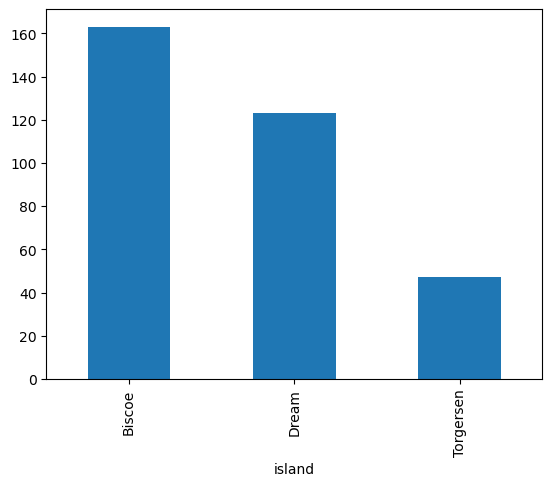

In [15]:
data['island'].value_counts().plot(kind = 'bar')

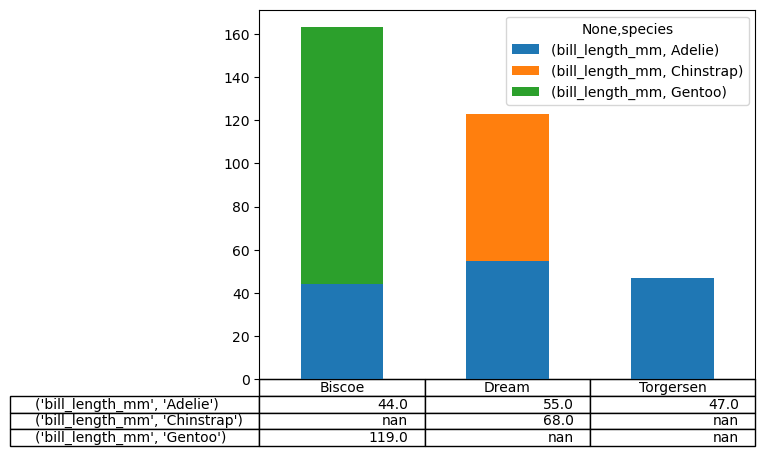

In [17]:
data.groupby(['island','species']).count()[['bill_length_mm']].unstack().plot(kind = 'bar', stacked = 'True', table = True)
plt.xlabel('')
plt.xticks([])
plt.show()

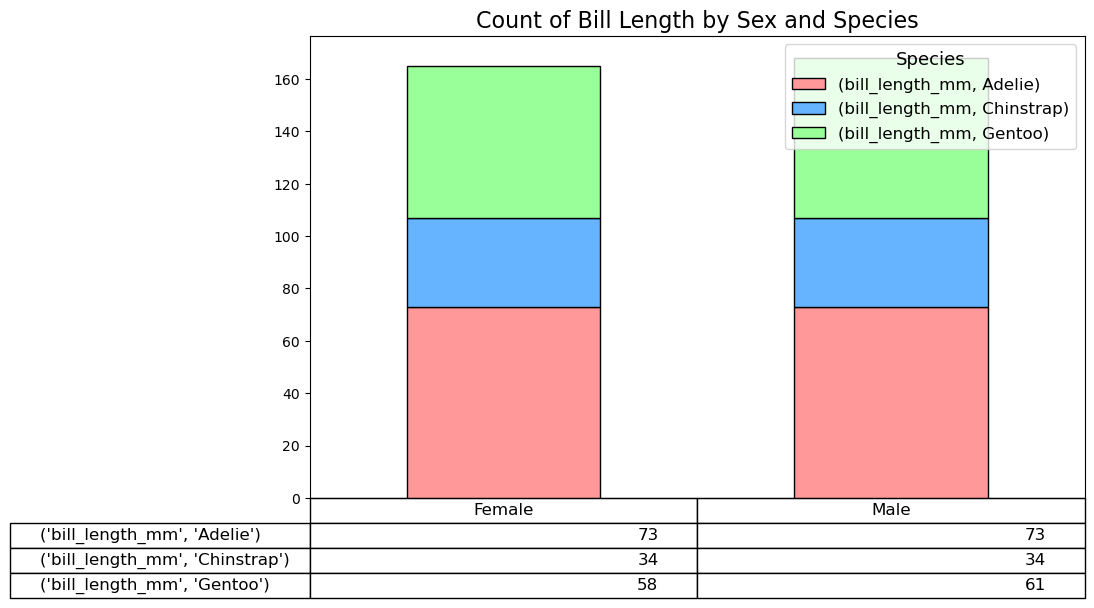

In [19]:
# Set a color palette
sns.set_palette("Set2")

# Create the grouped bar plot
ax = data.groupby(['sex','species']).count()[['bill_length_mm']].unstack().plot(
    kind='bar', 
    stacked=True, 
    table=True,
    figsize=(10, 6), 
    color=['#FF9999', '#66B3FF', '#99FF99'], # Example color palette
    edgecolor='black'
)

# Remove x-axis label
ax.set_xlabel('')

# Customize x-ticks
ax.set_xticks([])
ax.set_xticklabels('')

# Add a title and adjust font sizes
ax.set_title('Count of Bill Length by Sex and Species', fontsize=16)
ax.legend(title='Species', fontsize=12, title_fontsize=13)

# Customize the table
table = ax.tables[0]
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Display the plot
plt.show()

In [21]:
value = lambda x: (x.value_counts().keys(), x.value_counts().values)
x, values = value(data.species)
x

Index(['Adelie', 'Gentoo', 'Chinstrap'], dtype='object', name='species')

([<matplotlib.patches.Wedge at 0x22bd6f02690>,
 [Text(0.21141770592664771, 1.0794918034059888, 'Adelie'),
  Text(-0.8153728172890797, -0.7383543653463892, 'Gentoo'),
  Text(0.8813015780969663, -0.6582609880919552, 'Chinstrap')],
 [Text(0.11531874868726237, 0.588813710948721, '43.8%'),
  Text(-0.44474880943040707, -0.4027387447343941, '35.7%'),
  Text(0.48070995168925423, -0.3590514480501573, '20.4%')])

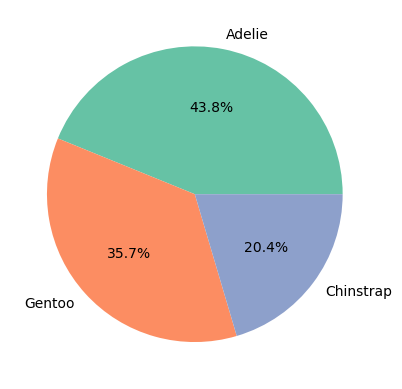

In [23]:
plt.pie (values, labels= x, autopct = '%1.1f%%')

([<matplotlib.patches.Wedge at 0x22bdc793230>,
 [Text(0.21141770592664771, 1.0794918034059888, 'Adelie'),
  Text(-0.8153728172890797, -0.7383543653463892, 'Gentoo'),
  Text(0.8813015780969663, -0.6582609880919552, 'Chinstrap')],
 [Text(0.11531874868726237, 0.588813710948721, '43.8%'),
  Text(-0.44474880943040707, -0.4027387447343941, '35.7%'),
  Text(0.48070995168925423, -0.3590514480501573, '20.4%')])

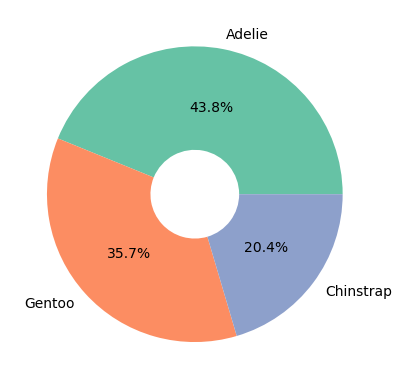

In [25]:
# plt.figure(dpi=1024)
plt.pie (values, labels= x, autopct = '%1.1f%%', wedgeprops = dict(width = 0.7)) #donut chart

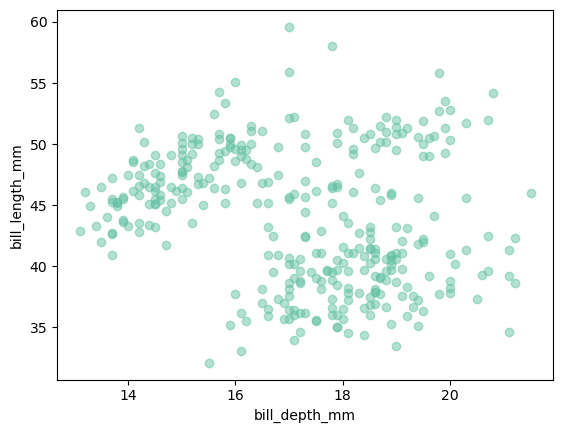

In [27]:
x,y = data.bill_depth_mm, data.bill_length_mm
plt.scatter(x,y,alpha = 0.5)
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.show()

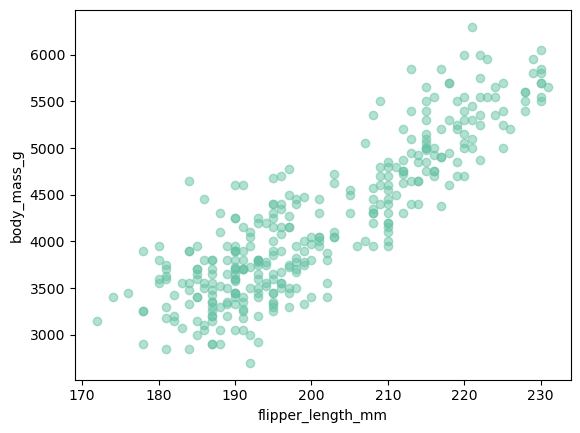

In [29]:
a,b = data.flipper_length_mm, data.body_mass_g
plt.scatter(a,b,alpha = 0.5)
plt.xlabel(a.name)
plt.ylabel(b.name)
plt.show()

TypeError: DataFrame.corrwith() missing 1 required positional argument: 'other'

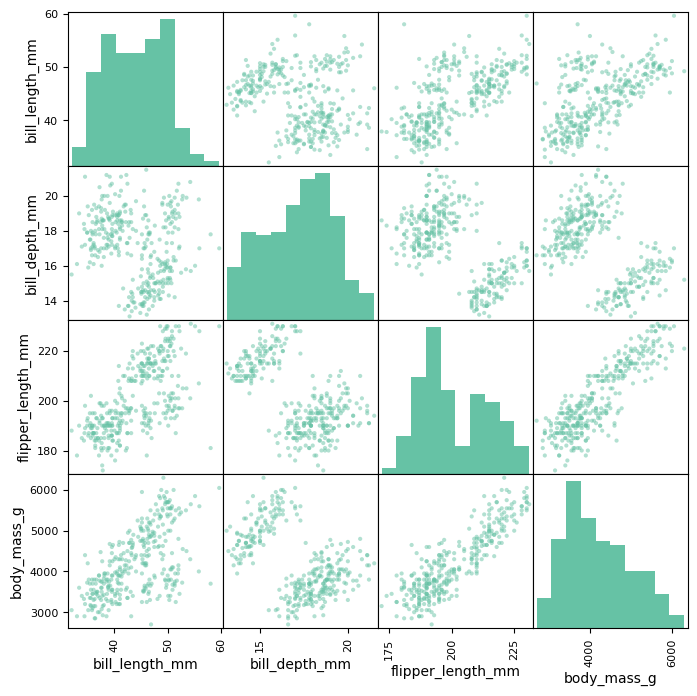

In [31]:
#scatter matrix
pd.plotting.scatter_matrix(data,figsize=(8,8))
pd.DataFrame().corrwith()
plt.tight_layout()
plt.show()

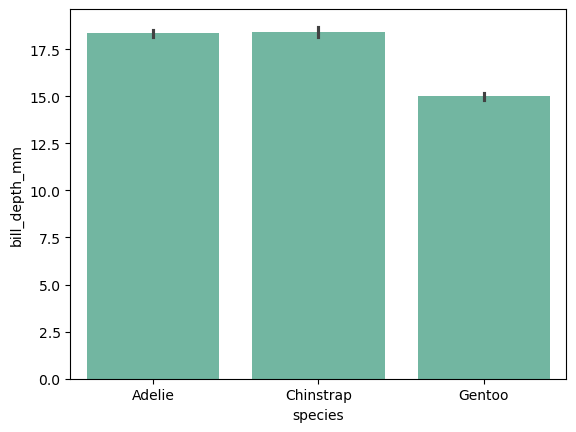

In [33]:
sns.barplot(x = 'species', y = 'bill_depth_mm', data = data)
plt.show()

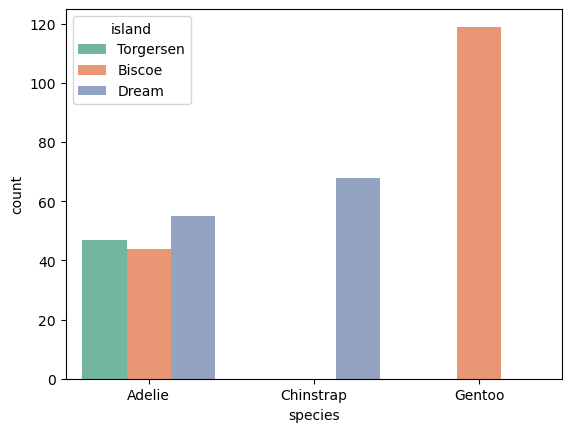

In [35]:
sns.countplot(data=data, x = 'species', hue = 'island')
plt.show()

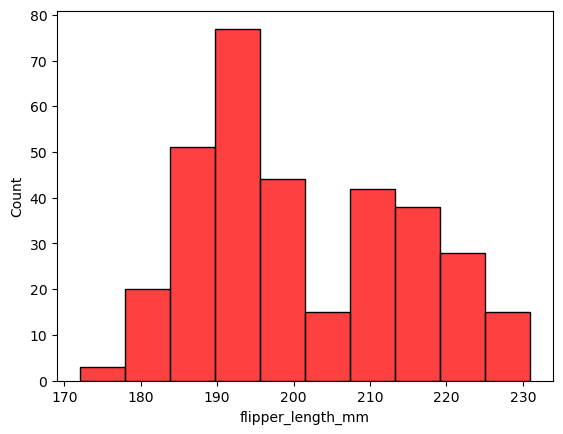

In [37]:
sns.histplot(data = data, x = 'flipper_length_mm', color = 'red')
plt.show()

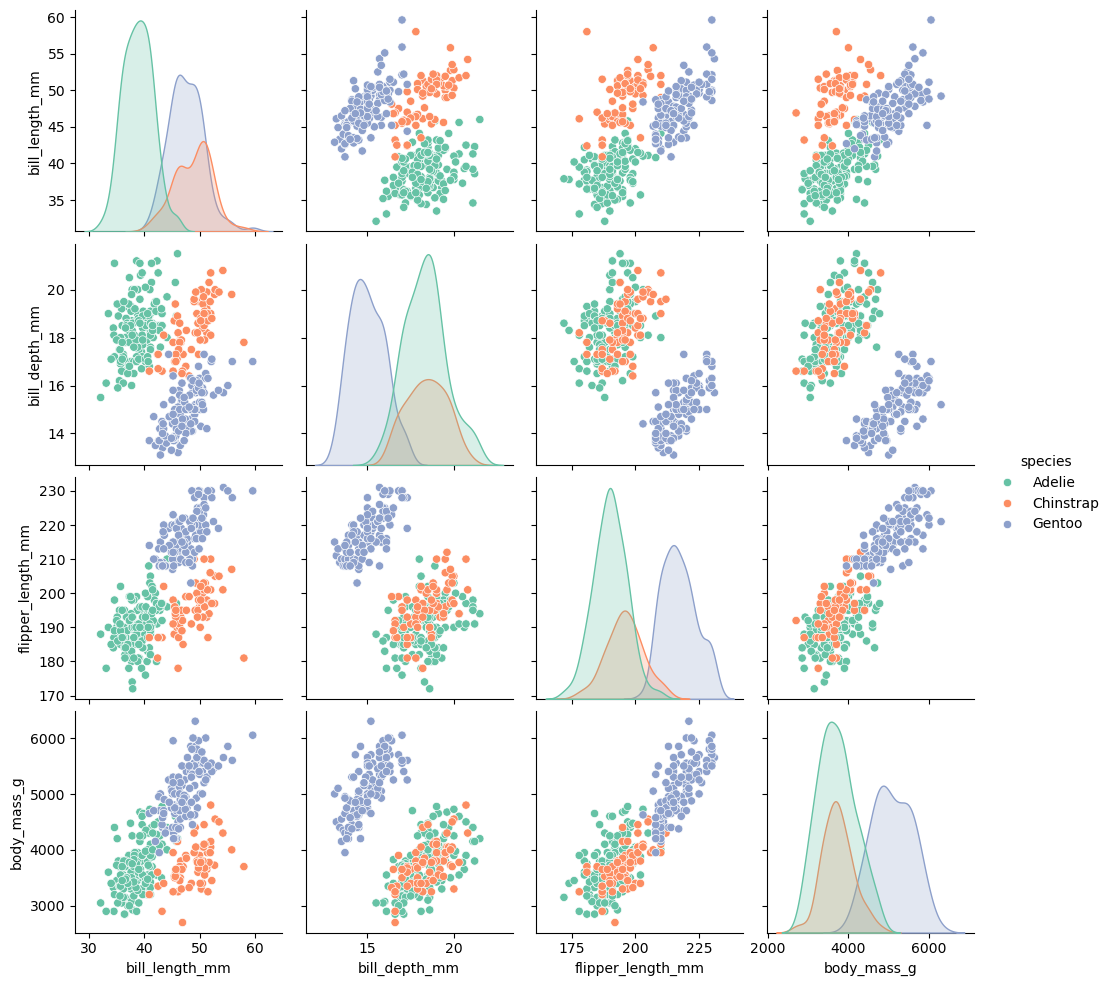

In [39]:
sns.pairplot(data, hue = 'species')
plt.show()

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

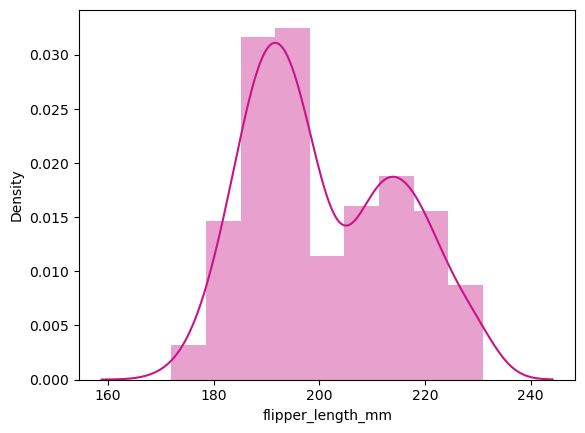

In [41]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data["flipper_length_mm"], color = '#C71585')

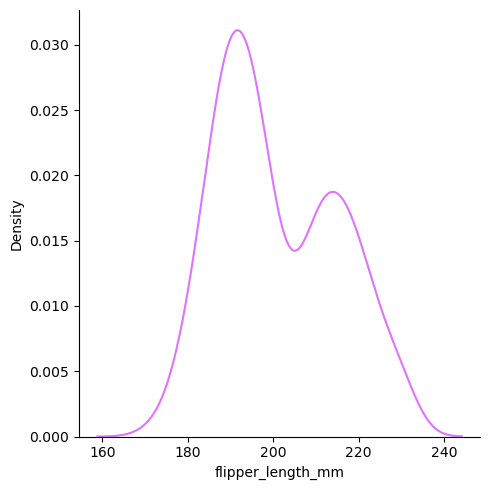

In [43]:
sns.displot(data = data, x= 'flipper_length_mm', kind = 'kde', color = '#DF73FF')
plt.show()

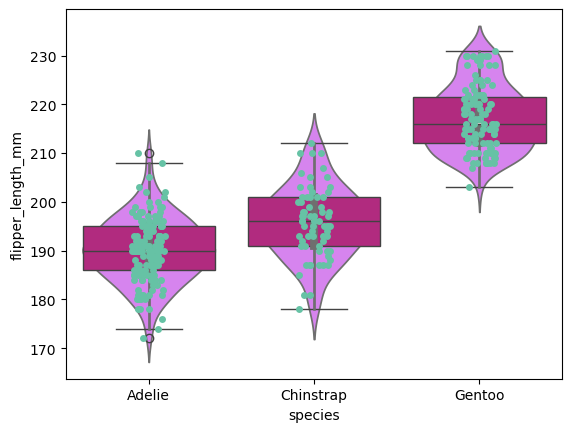

In [45]:
sns.boxplot(data=data, x= 'species', y='flipper_length_mm', color = '#C71585')
sns.violinplot(data=data, x= 'species', y='flipper_length_mm', color = '#DF73FF')
sns.stripplot(data=data, x= 'species', y='flipper_length_mm', jitter = True)
plt.show()

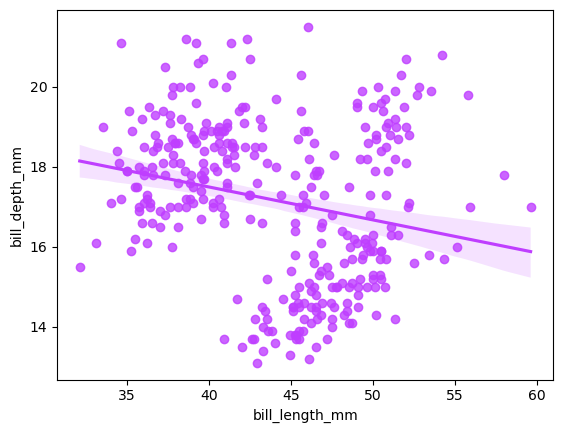

In [47]:
sns.regplot(data,x='bill_length_mm',y='bill_depth_mm',color='#BF3EFF')
plt.show()

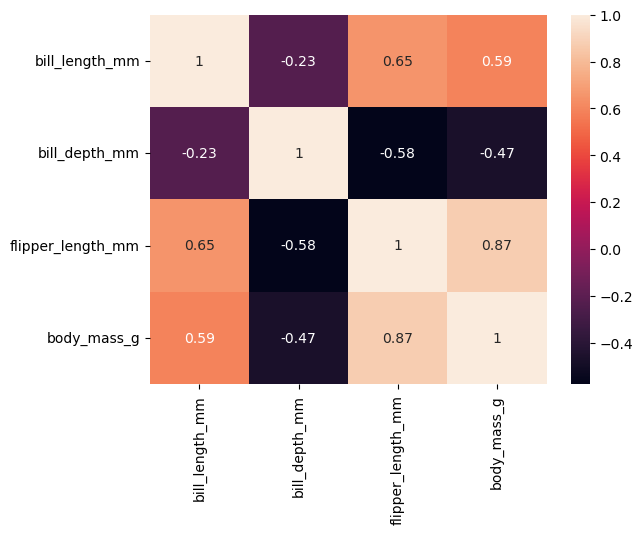

In [49]:
#heatmap
corr = data.select_dtypes('number').corr()
sns.heatmap(corr,annot=True)
plt.show()

In [51]:
tips = sns.load_dataset('tips')

In [53]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='total_bill'>

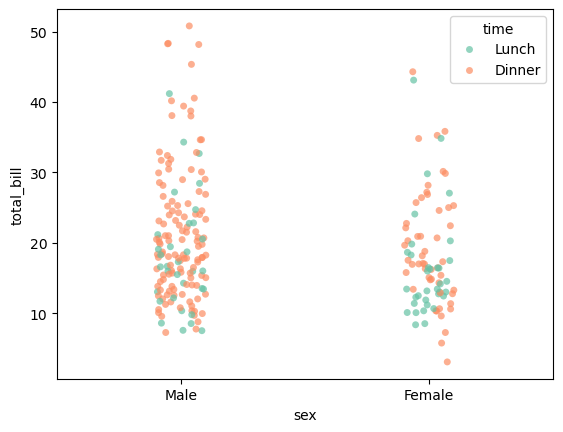

In [55]:
sns.stripplot(data=tips, x = 'sex', y = 'total_bill',hue = 'time', alpha = 0.7)

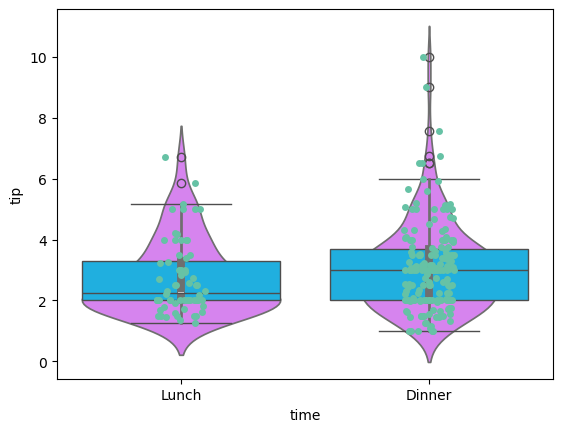

In [57]:
sns.boxplot(data=tips, x= 'time', y='tip', color = '#00BFFF')
sns.violinplot(data=tips, x= 'time', y='tip', color = '#DF73FF')
sns.stripplot(data=tips, x= 'time', y='tip', jitter = True)
plt.show()

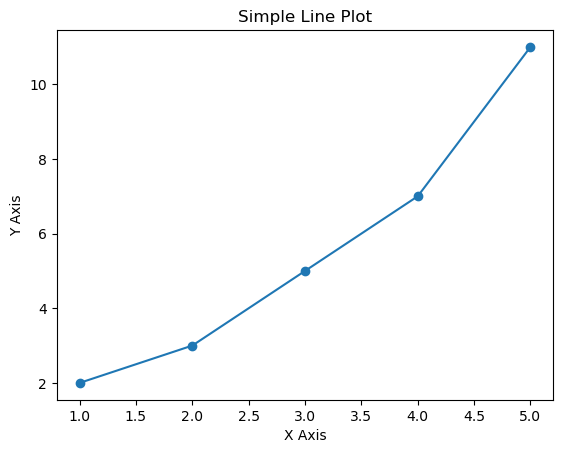

In [1]:
import matplotlib.pyplot as plt

# Data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a line plot
plt.plot(x, y, marker='o')

# Customize the plot
plt.title('Simple Line Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Show the plot
plt.show()

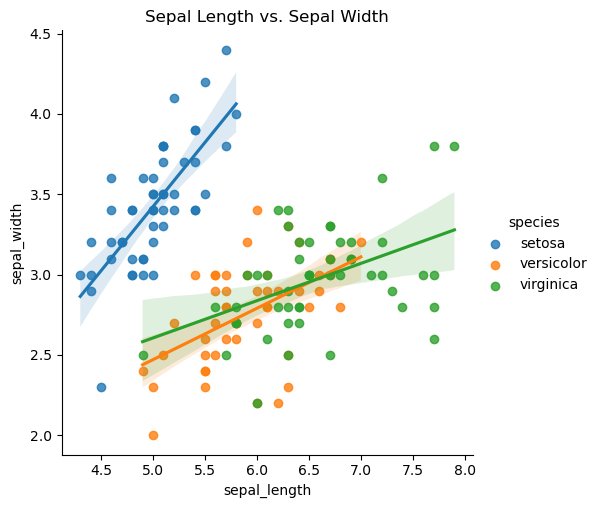

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = sns.load_dataset('iris')

# Create a scatter plot with regression line
sns.lmplot(x='sepal_length', y='sepal_width', data=data, hue='species')

# Customize the plot
plt.title('Sepal Length vs. Sepal Width')

# Show the plot
plt.show()


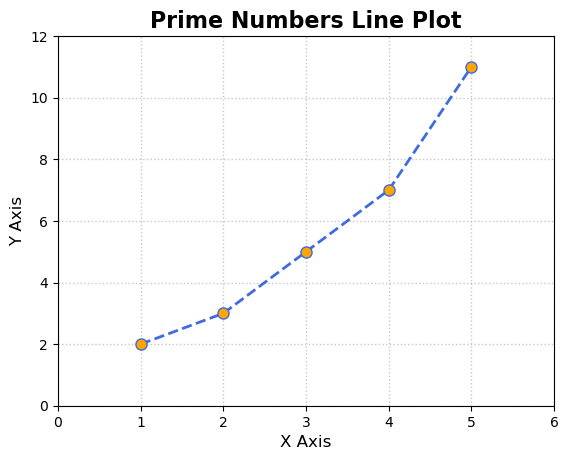

In [7]:
import matplotlib.pyplot as plt

# Apply a modern style
#plt.style.use('seaborn-darkgrid')

# Data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a line plot with customizations
plt.plot(x, y, color='royalblue', marker='o', linestyle='--', linewidth=2, markersize=8, markerfacecolor='orange')

# Customize the plot
plt.title('Prime Numbers Line Plot', fontsize=16, fontweight='bold')
plt.xlabel('X Axis', fontsize=12)
plt.ylabel('Y Axis', fontsize=12)
plt.grid(True, linestyle=':', linewidth=1, alpha=0.7)

# Set axis limits
plt.xlim(0, 6)
plt.ylim(0, 12)

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


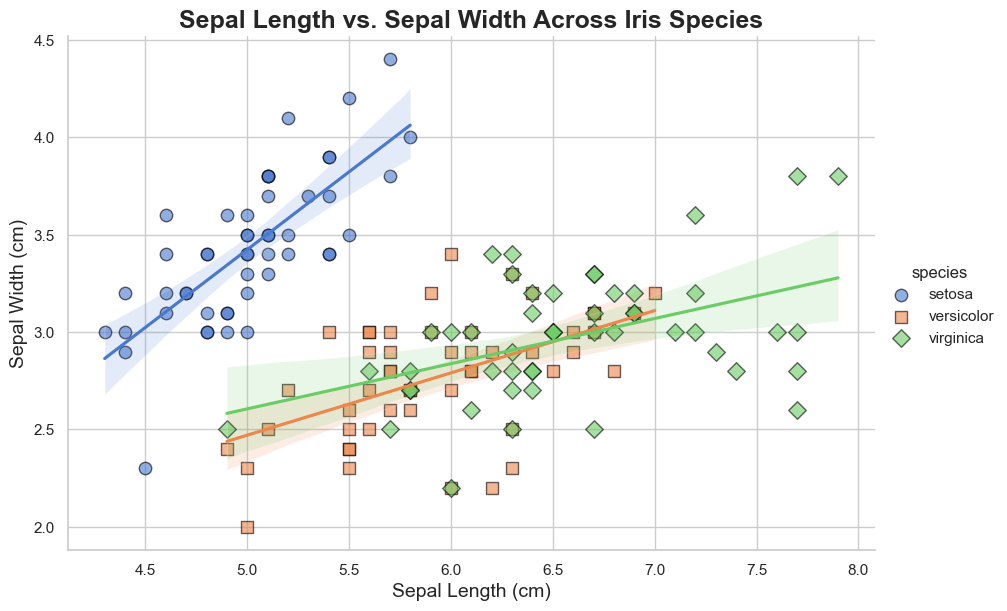

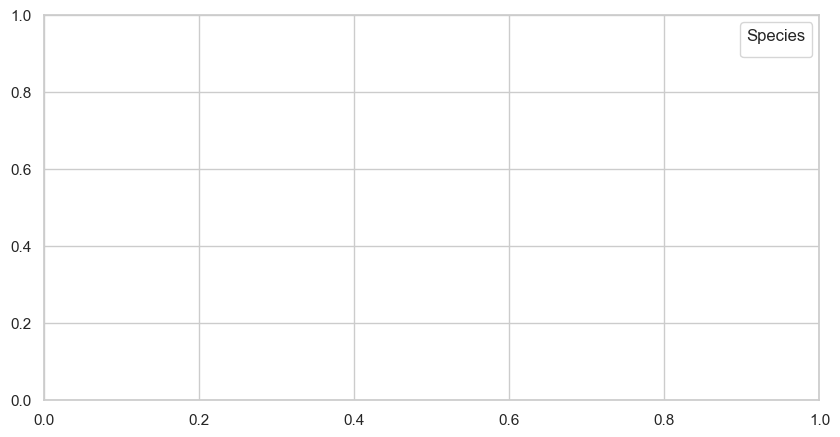

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and color palette
sns.set(style="whitegrid", palette="muted")

# Sample data
data = sns.load_dataset('iris')

# Create a scatter plot with regression line and customize markers
sns.lmplot(x='sepal_length', y='sepal_width', data=data, hue='species', 
           height=6, aspect=1.5, markers=['o', 's', 'D'], 
           scatter_kws={'s': 80, 'alpha': 0.6, 'edgecolor': 'black'})

# Customize the plot
plt.title('Sepal Length vs. Sepal Width Across Iris Species', fontsize=18, fontweight='bold')
plt.xlabel('Sepal Length (cm)', fontsize=14)
plt.ylabel('Sepal Width (cm)', fontsize=14)
plt.figure(figsize = (10,5))

# Adjust legend position
plt.legend(title='Species', loc='upper right')

# Show the plot
plt.show()
